#Student Name: Murali Krishnan Rajasekharan Pillai
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [1]:
!nvidia-smi

Thu Oct  3 23:29:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [46]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
MODEL_LOCATION = "gdrive/My Drive/ece595_ml2/models/"

Mounted at /content/gdrive


In [3]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, model_from_json
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.keras.callbacks import Callback
import pickle

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [4]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(-1, 784)
data_test = data_test.reshape(-1, 784)

# Part 1 : Fully Connected Autoencoder

In [0]:
class model_methods(object):
  def __init__(self, loss_fn, optim, ndim):
    """
    Try to develop a class which contains common functionality of
    NN models. Like saving a model & it's weights."""
    self.loss_fn = loss_fn
    self.optim = optim
    self.ndim = ndim
  
  def save_model_weights(self, h5_file_name):
    """
    Save weights of the model
    Parameters:
      :h5_file_name:    Identifier of the model weights h5 file
    """
    self.model.save_weights(h5_file_name)
  
  def save_model(self, json_file_name):
    """
    Save the model
    Parameters:
      :json_file_name:    Identifier of the model in json file
    """
    ae_model_json = self.model.to_json()
    with open(json_file_name, 'w') as json_file:
      json_file.write(ae_model_json)
  
  def load_model(self, json_file_name, h5_file_name):
    json_file = open(MODEL_LOCATION + json_file_name, 'r')
    loaded_from_json = json_file.read()
    json_file.close()
    ae_model = model_from_json(loaded_from_json) 
    ae_model.load_weights(MODEL_LOCATION + h5_file_name)
    return ae_model

  def save_model_history(self, model_history, file_name):
    """
    Save model history as a pickle file
    """
    with open(file_name, 'wb') as f:
      pickle.dump(model_history, f)

  def load_model_history(self, pkl_file_name):
    """
    Load model history pickle file
    """
    with open(MODEL_LOCATION + pkl_file_name , 'rb') as f:
      ae_history = pickle.load(f)
    return ae_history


In [0]:
class deep_autoencoder(model_methods):
  def __init__(self, loss_fn, optim, ndim):
    super().__init__(loss_fn, optim, ndim)
    self.model = self._build_model(self.ndim)

  
  def _build_model(self, ndim):
    """
    Defines and compiles the architecture
    Parameters:
      :loss_fn:    The loss function used in the model
      :optim:      The optimizer used for model
    Returns:
      :model:  The compiled model
    """
    model = Sequential()
    # First Hidden Layer
    model.add(Dense(400,
                    activation='relu',
                    kernel_initializer='uniform',
                    input_dim=self.ndim))
    # Second Hidden Layer
    model.add(Dense(196,
                    activation='relu',
                    kernel_initializer='uniform'))
    # third Hidden Layer (BottleNeck)
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='uniform'))
    # Fourth Hidden Layer
    model.add(Dense(196,
                    activation='relu',
                    kernel_initializer='uniform'))
    # Fifth Hidden Layer
    model.add(Dense(400,
                    activation='relu',
                    kernel_initializer='uniform'))
    # Output Layer                                                                                                          
    model.add(Dense(self.ndim,
                    activation='sigmoid',
                    kernel_initializer='uniform'))
    model.compile(loss=self.loss_fn,
                  optimizer=self.optim)
    return model
    
  def fit(self, d_train, d_test, 
          n_epochs=100, 
          batch_size=50,
          display=25):
    """
      Fit the model

      Parameters:
        :d_train:    Tuple of (training data, training labels)
        :d_test:     Tuple of (testing data, testing labels)
        :n_epochs:   Number of epochs for fit
        :batch_size: Number of samples per gradient update
      Returns:
        :model_history: History object containing all model history info

    """
    data_train, labels_train = d_train
    #out_batch = NBatchLogger(display)
    model_history = self.model.fit(data_train, labels_train,
                          validation_data=d_test,
                          epochs=n_epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          )
    return model_history


In [0]:
ae = deep_autoencoder("mse", "adam", 784)

In [0]:
ae_history = ae.fit((data_train, data_train),
                    (data_test, data_test),
                    n_epochs=150,
                    batch_size=1024)



Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 37us/step - loss: 0.1067 - val_loss: 0.0730
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0695 - val_loss: 0.0654
Epoch 3/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0619 - val_loss: 0.0573
Epoch 4/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.0547 - val_loss: 0.0507
Epoch 5/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0475 - val_loss: 0.0423
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0374 - val_loss: 0.0337
Epoch 7/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0321 - val_loss: 0.0299
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0289 - val_loss: 0.0269
Epoch 9/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.0264 - val_loss: 0

In [0]:
ae.save_model_weights("ae_model_weights.h5")
ae.save_model("ae_model.json")
ae.save_model_history(ae_history, "ae_model_history.pkl")

In [0]:
! cp -r ae_model.json ae_model_weights.h5 ae_model_history.pkl ./gdrive/My\ Drive/ece595_ml2/models/

In [0]:
ae_model = ae.load_model("ae_model.json", "ae_model_weights.h5")

In [0]:
reconstructions = ae_model.predict(data_test)

In [0]:
print(len(ae_model.layers))
print(ae_model.summary())

6
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 196)               78596     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               19700     
_________________________________________________________________
dense_4 (Dense)              (None, 196)               19796     
_________________________________________________________________
dense_5 (Dense)              (None, 400)               78800     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               314384    
Total params: 825,276
Trainable params: 825,276
Non-trainable params: 0
______________________________________________

In [0]:
def get_hidden_layers_representation(model, data_test):
  """
  Find the hidden layers representation for a model
  Parameters:
    :model:        The model object whose hidden layers to extract
    :test data:    The test data whose representations we seek
  Returns:
    :hl:           The weights of the hidden layers
  """

  n_layers = len(model.layers)
  hl_weights = {}
  for i in range(1, n_layers+1, 1):
    hl_function = K.function([model.layers[0].input], [model.layers[i-1].output])
    hl_weights[i] = []
    hl_weights[i].append(hl_function([data_test])[0])
  return hl_weights

In [0]:
w_hl = get_hidden_layers_representation(ae_model, data_test)

## Layer Representations

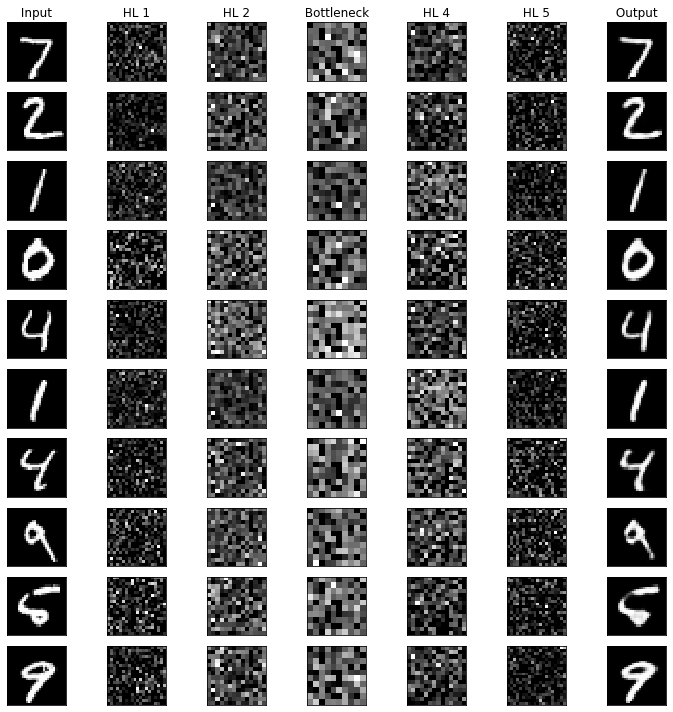

In [0]:
n = 10
n_layers = len(ae_model.layers)
layers = [' Input ',
          ' HL 1 ',
          ' HL 2 ',
          ' Bottleneck ',
          ' HL 4 ',
          ' HL 5 ',
          ' Output ']
cols = ['{}'.format(col) for col in layers]
#rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]
fig, axes = plt.subplots(nrows=n, ncols=n_layers+1, figsize=(10, 10))
for i in range(n):
    axes[i, 0].imshow(data_test[i].reshape(28, 28),
                 cmap=plt.cm.gray)
    axes[i, 1].imshow(w_hl[1][0][i,:].reshape(20, 20),
                 cmap=plt.cm.gray)
    axes[i, 2].imshow(w_hl[2][0][i,:].reshape(14, 14),
                 cmap=plt.cm.gray)
    axes[i, 3].imshow(w_hl[3][0][i,:].reshape(10, 10),
                 cmap=plt.cm.gray)
    axes[i, 4].imshow(w_hl[4][0][i,:].reshape(14, 14),
                 cmap=plt.cm.gray)
    axes[i, 5].imshow(w_hl[5][0][i,:].reshape(20, 20),
                 cmap=plt.cm.gray)
    axes[i, 6].imshow(w_hl[6][0][i,:].reshape(28, 28),
                 cmap=plt.cm.gray)
    for ax, col in zip(axes[0], cols):
      ax.set_title(col)
    for j in range(n_layers+1):
      axes[i, j].get_xaxis().set_visible(False)
      axes[i, j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

## Loss Curves

In [0]:
ae_history = ae.load_model_history("ae_model_history.pkl")

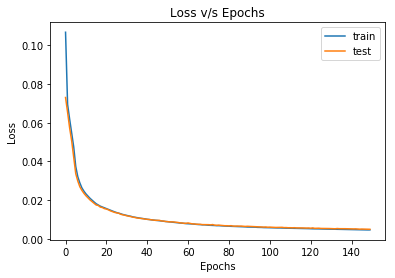

In [0]:
plt.plot(ae_history.history['loss'])
plt.plot(ae_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss v/s Epochs")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Part 2: Deep Convolutional AutoEncoder

In [0]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

In [0]:
class convolutional_autoencoder(model_methods):
  def __init__(self, loss_fn, optim, ndim):
    super().__init__(loss_fn, optim, ndim)
    self.model = self._build_model(self.ndim)

  
  def _build_model(self, ndim):
    """
    Defines and compiles the architecture
    Parameters:
      :loss_fn:    The loss function used in the model
      :optim:      The optimizer used for model
    Returns:
      :model:  The compiled model
    """
    model = Sequential()

    # First Hidden Layer
    model.add(Conv2D(16,
                    kernel_size=3,
                    activation='relu',
                    kernel_initializer='uniform',
                    padding='same',
                    input_shape=(self.ndim, self.ndim, 1)))
    
    # Second Hidden Layer
    model.add(MaxPooling2D(pool_size=(2, 2),
                           padding='same'))
    # Third Hidden Layer
    model.add(Conv2D(8,
                     kernel_size=3,
                     activation='relu',
                     padding='same',
                     kernel_initializer='uniform'))
    
    # Fourth Hidden Layer (Bottleneck)
    model.add(MaxPooling2D(pool_size=(2, 2),
                           padding='same'))
    #Fifth Hidden Layer
    model.add(Conv2D(8,
                     kernel_size=3,
                     padding='same',
                     activation='relu',
                     kernel_initializer='uniform'))
    # Sixth Hidden Layer
    model.add(UpSampling2D(size=(2, 2)))
    #Seventh Hidden Layer
    model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu',
                     padding='same',
                     kernel_initializer='uniform'))
    # Eighth hidden layer
    model.add(UpSampling2D(size=(2, 2)))
    # Output layer
    model.add(Conv2D(1,
                     kernel_size=3,
                     kernel_initializer='uniform',
                     padding='same',
                     activation='sigmoid'))
    
    model.compile(loss=self.loss_fn,
                  optimizer=self.optim)
    return model
    
  def fit(self, d_train, d_test, 
          n_epochs=100, 
          batch_size=50,
          display=25):
    """
      Fit the model

      Parameters:
        :d_train:    Tuple of (training data, training labels)
        :d_test:     Tuple of (testing data, testing labels)
        :n_epochs:   Number of epochs for fit
        :batch_size: Number of samples per gradient update
      Returns:
        :model_history: History object containing all model history info

    """
    data_train, labels_train = d_train
    #out_batch = NBatchLogger(display)
    model_history = self.model.fit(data_train, labels_train,
                          validation_data=d_test,
                          epochs=n_epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          )
    return model_history

In [8]:
cae = convolutional_autoencoder('binary_crossentropy', 'adam', 28)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
cae_history = cae.fit((data_train, data_train),
                    (data_test, data_test),
                    n_epochs=150,
                    batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.5798 - val_loss: 0.4495
Epoch 2/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.3640 - val_loss: 0.2452
Epoch 3/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1978 - val_loss: 0.1640
Epoch 4/150
60000/60000 [==============================] - 3s 46us/step - loss: 0.1455 - val_loss: 0.1287
Epoch 5/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1219 - val_loss: 0.1145
Epoch 6/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1117 - val_loss: 0.1066
Epoch 7/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1045 - val_loss: 0.1001
Epoch 8/150
60000/60000 [==============================] - 3s 48us/step - loss: 0.0990 - val_loss: 0.0957
Epoch 9/150
60000/60000 [==============================] - 3s 48us/step - loss: 0.0953 - val_loss: 0.

In [0]:
cae.save_model_weights("cae_model_weights.h5")
cae.save_model("cae_model.json")
cae.save_model_history(cae_history, "cae_model_history.pkl")

In [0]:
! cp -r cae_model.json cae_model_weights.h5 cae_model_history.pkl ./gdrive/My\ Drive/ece595_ml2/models/

In [0]:
cae_model = cae.load_model("cae_model.json", "cae_model_weights.h5")

In [0]:
cae_reconstructions = cae_model.predict(data_test)

In [14]:
print(len(cae_model.layers))
print(cae_model.summary())

9
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)     

In [0]:
cae_w_hl = get_hidden_layers_representation(cae_model, data_test)

## Layer Representation

In [0]:
n_samples = 10
n_layers = len(cae_model.layers)
layers = [' Input ',
          ' Conv2d 1 ',
          ' MP 1 ',
          ' Conv2d 2 ',
          ' MP 2 ',
          ' Bottleneck ',
          ' US 1 ',
          ' Conv2d 3 ',
          ' US 2 ',
          ' Output ']
cols = ['{}'.format(col) for col in layers]

In [0]:
n_kernels = [cae_w_hl[i][0][0].shape[2] for i in range(1, n_layers)]

In [0]:
def hidden_layer_weights(mat):
  """
  hidden weights
  """
  f = mat.shape[0]
  m = max(mat.shape[2] // 4, 1)
  n = max(mat.shape[2] // m, 1)
  temp = np.zeros((f*m, f*n))
  for j in range(m):
    for k in range(n):
      temp[f*j:f*(j+1), f*k:f*(k+1)] = mat[:, :, j*m+k]
  return temp

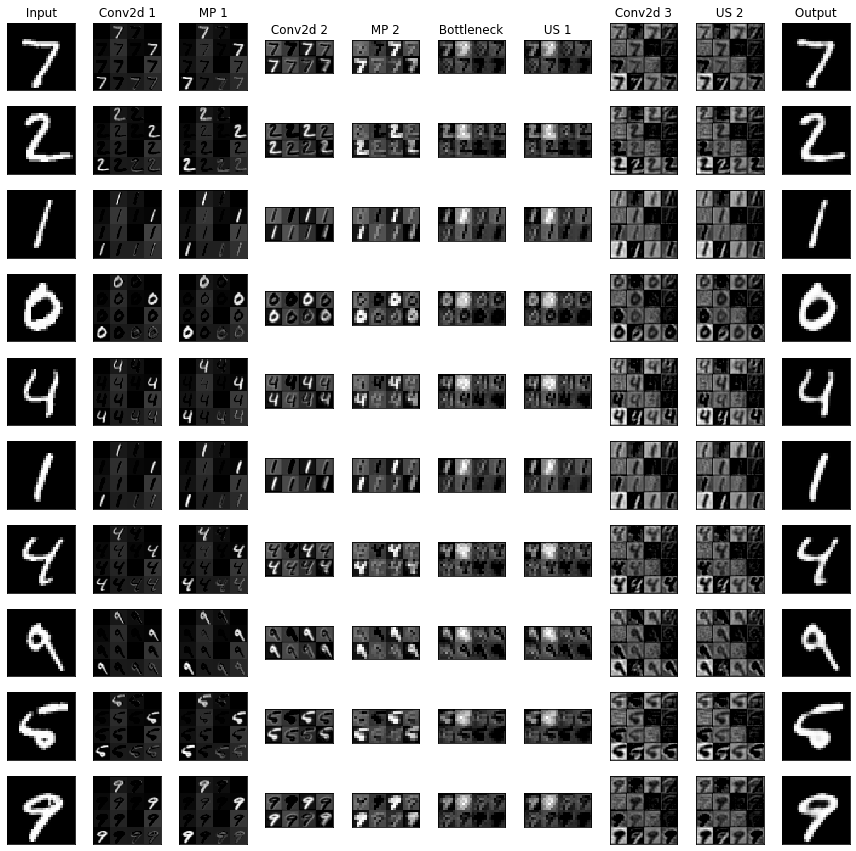

In [44]:
fig, axes = plt.subplots(nrows=n_samples, ncols=n_layers+1, figsize=(12, 12))
for i in range(n_samples):
    axes[i, 0].imshow(data_test[i].reshape(28, 28),
                 cmap=plt.cm.gray)
    
    temp1 = hidden_layer_weights(cae_w_hl[1][0][i])
    axes[i, 1].imshow(temp1, cmap=plt.cm.gray)
    temp2 = hidden_layer_weights(cae_w_hl[2][0][i])
    axes[i, 2].imshow(temp2, cmap=plt.cm.gray)
    temp3 = hidden_layer_weights(cae_w_hl[3][0][i])
    axes[i, 3].imshow(temp3, cmap=plt.cm.gray)
    temp4 = hidden_layer_weights(cae_w_hl[4][0][i])
    axes[i, 4].imshow(temp4, cmap=plt.cm.gray)
    temp5 = hidden_layer_weights(cae_w_hl[5][0][i])
    axes[i, 5].imshow(temp5, cmap=plt.cm.gray)
    temp6 = hidden_layer_weights(cae_w_hl[6][0][i])
    axes[i, 6].imshow(temp6, cmap=plt.cm.gray)
    temp7 = hidden_layer_weights(cae_w_hl[7][0][i])
    axes[i, 7].imshow(temp7, cmap=plt.cm.gray)
    temp8 = hidden_layer_weights(cae_w_hl[8][0][i])
    axes[i, 8].imshow(temp8, cmap=plt.cm.gray)
    temp9 = hidden_layer_weights(cae_w_hl[9][0][i])
    axes[i, 9].imshow(temp9, cmap=plt.cm.gray)
    for ax, col in zip(axes[0], cols):
      ax.set_title(col)
    for j in range(n_layers+1):
      axes[i, j].get_xaxis().set_visible(False)
      axes[i, j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

## Loss Curves

In [0]:
cae_history = cae.load_model_history("cae_model_history.pkl")

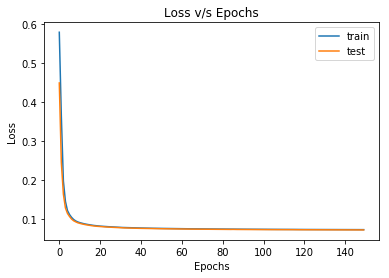

In [48]:
plt.plot(cae_history.history['loss'])
plt.plot(cae_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss v/s Epochs")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Part 3: Denoising AutoEncoder

In [0]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
data_train_noisy = data_train_noisy.reshape(-1, 28, 28, 1)
data_test_noisy = data_test_noisy.reshape(-1, 28, 28, 1)

## Original Samples of Training Data

In [0]:
n_samples = 10
layers = [' Input ',
          ' Noisy Input ']
cols = ['{}'.format(col) for col in layers]

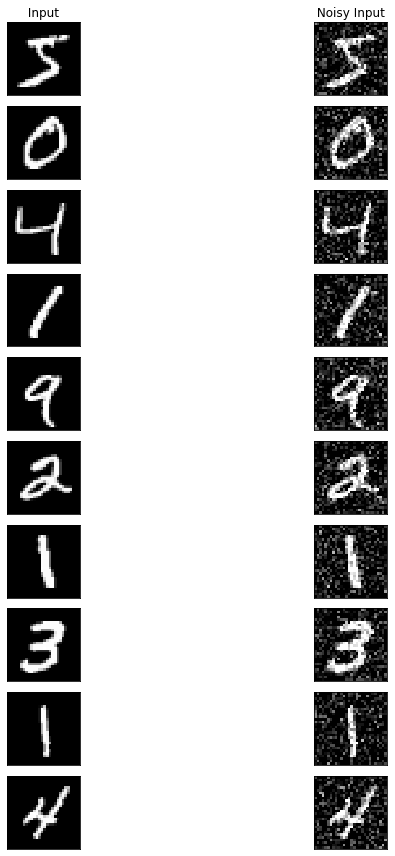

In [55]:
fig, axes = plt.subplots(nrows=n_samples, ncols=2, figsize=(12, 12))
for i in range(n_samples):
    axes[i, 0].imshow(data_train[i].reshape(28, 28),
                 cmap=plt.cm.gray)
    axes[i, 1].imshow(data_train_noisy[i].reshape(28, 28),
                 cmap=plt.cm.gray)
    for ax, col in zip(axes[0], cols):
      ax.set_title(col)
    for j in range(2):
      axes[i, j].get_xaxis().set_visible(False)
      axes[i, j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

## Denoising Autoencoder

In [0]:
dae = convolutional_autoencoder('binary_crossentropy', 'adam', 28)

In [58]:
dae_history = dae.fit((data_train_noisy, data_train),
                    (data_test_noisy, data_test),
                    n_epochs=150,
                    batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 4s 67us/step - loss: 0.5769 - val_loss: 0.4620
Epoch 2/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.3768 - val_loss: 0.2586
Epoch 3/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1919 - val_loss: 0.1667
Epoch 4/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1545 - val_loss: 0.1379
Epoch 5/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1262 - val_loss: 0.1160
Epoch 6/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1135 - val_loss: 0.1090
Epoch 7/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1084 - val_loss: 0.1053
Epoch 8/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1053 - val_loss: 0.1028
Epoch 9/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1032 - val_loss: 0.1

In [0]:
dae.save_model_weights("dae_model_weights.h5")
dae.save_model("dae_model.json")
dae.save_model_history(dae_history, "dae_model_history.pkl")

In [0]:
! cp -r dae_model.json dae_model_weights.h5 dae_model_history.pkl ./gdrive/My\ Drive/ece595_ml2/models/

In [0]:
dae_model = dae.load_model("dae_model.json", "dae_model_weights.h5")

In [0]:
dae_reconstructions = dae_model.predict(data_test_noisy)

In [63]:
print(len(dae_model.layers))
print(dae_model.summary())

9
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)     

In [0]:
dae_w_hl = get_hidden_layers_representation(dae_model, data_test_noisy)

## Layer Representation

In [0]:
n_samples = 10
n_layers = len(dae_model.layers)
layers = [' Noisy Input ',
          ' Conv2d 1 ',
          ' MP 1 ',
          ' Conv2d 2 ',
          ' MP 2 ',
          ' Bottleneck ',
          ' US 1 ',
          ' Conv2d 3 ',
          ' US 2 ',
          ' De-noised Output ']
cols = ['{}'.format(col) for col in layers]

In [0]:
n_kernels = [dae_w_hl[i][0][0].shape[2] for i in range(1, n_layers)]

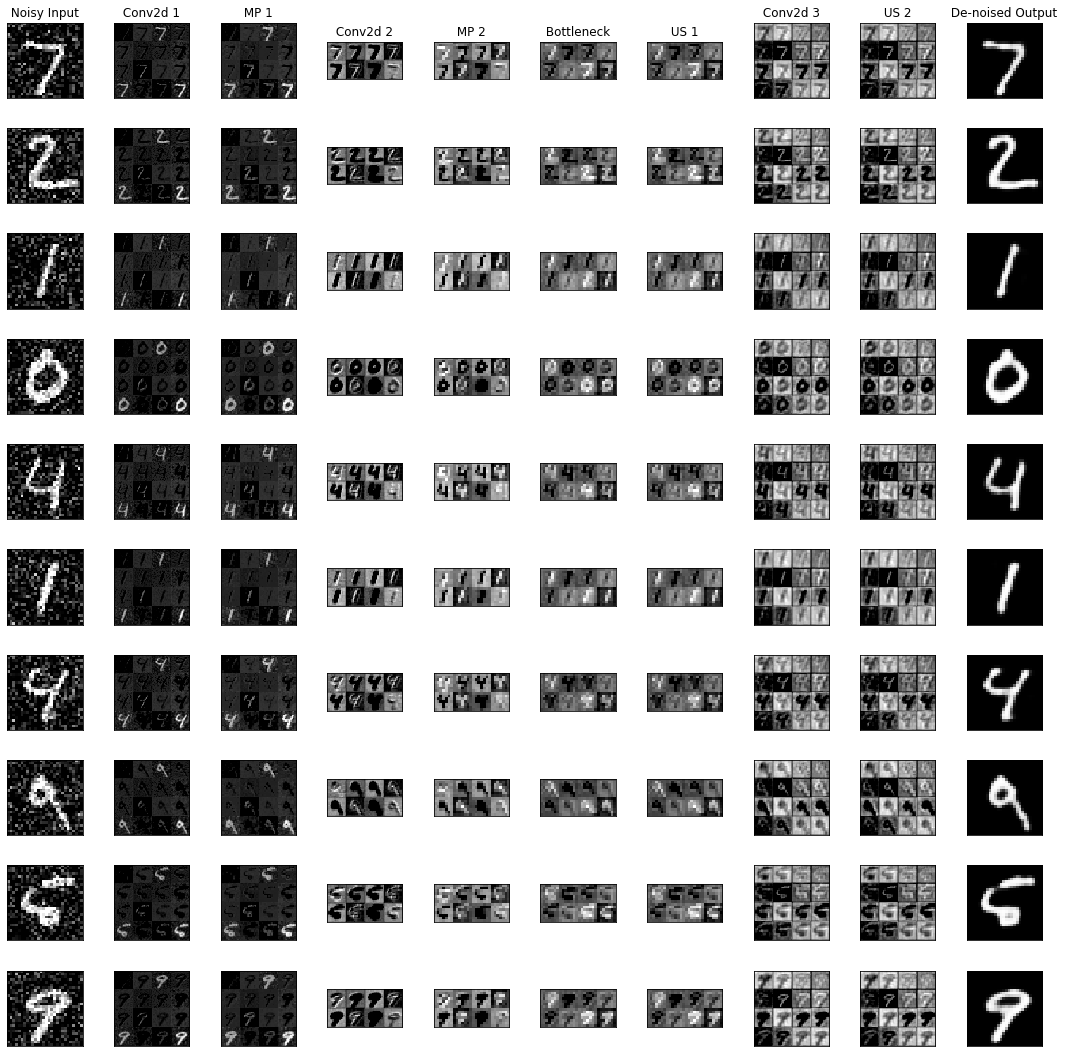

In [71]:
fig, axes = plt.subplots(nrows=n_samples, ncols=n_layers+1, figsize=(15, 15))
for i in range(n_samples):
    axes[i, 0].imshow(data_test_noisy[i].reshape(28, 28),
                 cmap=plt.cm.gray)
    for j in range(1, n_layers + 1, 1):
      temp1 = hidden_layer_weights(dae_w_hl[j][0][i])
      axes[i, j].imshow(temp1, cmap=plt.cm.gray)
    for ax, col in zip(axes[0], cols):
      ax.set_title(col)
    for j in range(n_layers+1):
      axes[i, j].get_xaxis().set_visible(False)
      axes[i, j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

## Loss Curves

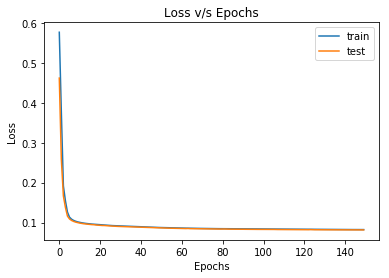

In [72]:
plt.plot(dae_history.history['loss'])
plt.plot(dae_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss v/s Epochs")
plt.legend(['train', 'test'], loc='upper right')
plt.show()